In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import glob
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data_path = "./Dataset/Train"
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", "Space"]
classes = len(categories)

w = 224
h = 224

x = []
t = []
count = 100

for i, j in enumerate(categories):
    
    # One-hot Encoding
    label = [0 for k in range(classes)]
    label[i] = 1
    
    img_path = data_path + "/" + j
    files = glob.glob(img_path + "/*.jpg")[:count]
    print(j, "파일 길이 : ", len(files))
    
    # 이미지 전처리
    for k, f in enumerate(files):
  
        img = Image.open(f)
        img = img.convert("RGB")   # RGB 채널로 변환
        img = img.resize((w, h))   # 이미지 크기 조정
        data = np.asarray(img)   # numpy 배열로 변환
        x.append(data)
        t.append(label)
          
x = np.array(x)
t = np.array(t)

print('데이터 준비 및 전처리 완료!')

A 파일 길이 :  100
B 파일 길이 :  100
C 파일 길이 :  100
D 파일 길이 :  100
E 파일 길이 :  100
F 파일 길이 :  100
G 파일 길이 :  100
H 파일 길이 :  100
I 파일 길이 :  100
J 파일 길이 :  100
K 파일 길이 :  100
L 파일 길이 :  100
M 파일 길이 :  100
N 파일 길이 :  100
O 파일 길이 :  100
P 파일 길이 :  100
Q 파일 길이 :  100
R 파일 길이 :  100
S 파일 길이 :  100
T 파일 길이 :  100
U 파일 길이 :  100
V 파일 길이 :  100
W 파일 길이 :  100
X 파일 길이 :  100
Y 파일 길이 :  100
Z 파일 길이 :  100
Nothing 파일 길이 :  100
Space 파일 길이 :  100
데이터 준비 및 전처리 완료!


In [3]:
print(type(x))
print(type(t))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
x_train, x_test, t_train, t_test = train_test_split(x, t)
dataset_numpy = (x_train, x_test, t_train, t_test)

In [5]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(2100, 224, 224, 3)
(2100, 28)
(700, 224, 224, 3)
(700, 28)


In [6]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(28, activation='softmax')(x)

In [8]:
model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [14]:
model.fit(x_train, t_train, epochs=10, batch_size=32, validation_data=(x_test, t_test))

Epoch 1/10
66/66 [==============================] - 409s 6s/step - loss: 0.5021 - accuracy: 0.8662 - val_loss: 94.3296 - val_accuracy: 0.1171
Epoch 2/10
66/66 [==============================] - 396s 6s/step - loss: 0.1380 - accuracy: 0.9643 - val_loss: 6.9470 - val_accuracy: 0.4271
Epoch 3/10
66/66 [==============================] - 395s 6s/step - loss: 0.0766 - accuracy: 0.9790 - val_loss: 7.1407 - val_accuracy: 0.1557
Epoch 4/10
66/66 [==============================] - 395s 6s/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 0.2760 - val_accuracy: 0.9086
Epoch 5/10
66/66 [==============================] - 396s 6s/step - loss: 0.0383 - accuracy: 0.9900 - val_loss: 4.9263 - val_accuracy: 0.5329
Epoch 6/10
66/66 [==============================] - 397s 6s/step - loss: 0.0979 - accuracy: 0.9762 - val_loss: 9.9476 - val_accuracy: 0.2514
Epoch 7/10
66/66 [==============================] - 395s 6s/step - loss: 0.0576 - accuracy: 0.9857 - val_loss: 1.1332 - val_accuracy: 0.8014
Epoch 8/10
6

In [15]:
# 모델 평가
loss, accuracy = model.evaluate(x_test, t_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

22/22 [==============================] - 26s 1s/step - loss: 4.2630e-05 - accuracy: 1.0000
Test Loss: 4.2630119423847646e-05
Test Accuracy: 1.0


1/1 [==============================] - 1s 743ms/step
분류 : B/ 정답 : B


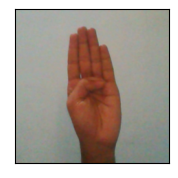

1/1 [==============================] - 0s 83ms/step
분류 : U/ 정답 : U


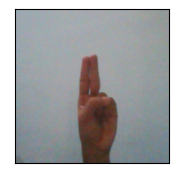

1/1 [==============================] - 0s 84ms/step
분류 : A/ 정답 : A


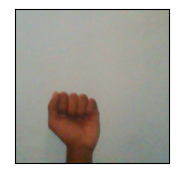

1/1 [==============================] - 0s 81ms/step
분류 : U/ 정답 : U


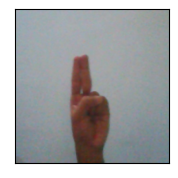

1/1 [==============================] - 0s 83ms/step
분류 : Y/ 정답 : Y


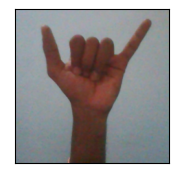

1/1 [==============================] - 0s 79ms/step
분류 : G/ 정답 : G


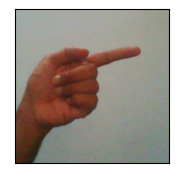

1/1 [==============================] - 0s 82ms/step
분류 : Q/ 정답 : Q


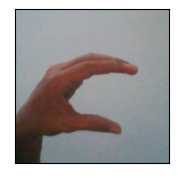

1/1 [==============================] - 0s 80ms/step
분류 : Nothing/ 정답 : Nothing


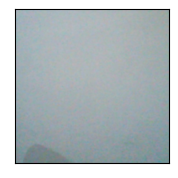

1/1 [==============================] - 0s 81ms/step
분류 : W/ 정답 : W


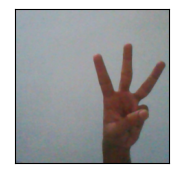

1/1 [==============================] - 0s 80ms/step
분류 : D/ 정답 : D


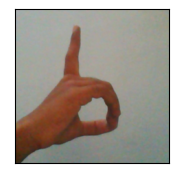

In [17]:
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", "Space"]

width = 224
height = 224
channel = 3

for i in range(10, 20):
    plt.figure(figsize = (2, 2))
    
    output = model.predict(x_test[i].reshape(1, width, height, channel))
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(width, height, channel), cmap = 'gray')
    
    print('분류 : ' + categories[np.argmax(output)] + '/ 정답 : ' + categories[np.argmax(t_test[i])])
    plt.show()